In [1]:
import pandas as pd
import numpy as np
a=pd.read_excel("C:\\Users\Ogeid99\Desktop\complete_catalogue_CSI11.xlsx")
a=a.drop(['LatitudeFake', 'LongitudeFake'], axis=1)
a['Magnitude']=a['Magnitude'].replace({999.0:None}) 
a['Time']=a['Time'].astype(str)
a.dropna(inplace=True)

In [2]:
print(a.iloc[33438])

OriginTime             59.02
Time                 9302318
Latitude             4230.24
Longitude            1253.91
Depth/Km                2.79
Magnitude                1.6
MagnitudeType          MlMDN
RMS                    0.061
AzimutalGap               91
ERH                      0.2
ERZ                      1.8
DistSeismometer           22
NPH                       16
Column14           00EV09190
Name: 78460, dtype: object


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="darkgrid")
time=a['Time']
magnitude=a['Magnitude']
zero='0'
new_time=[]
for i in range(len(a['Time'])):
    z=a['Time'].iloc[i]
    if i <= 31121: #cutoff
        z=z[:2] +'-'+z[2:4]+'-'+z[4:6]+'-'+z[6:8]+':'+z[8:10] #if you run the script multiple times, strange things happen
    #data cleansing part
    else:
        if i<33439:
            z=zero+zero+'-'+zero+z[:1] +'-'+z[1:3]+'-'+z[3:5]+':'+z[5:7] 
        elif i < 33978:
            z=zero+zero+'-'+z[:2] +'-'+z[2:4]+'-'+z[4:6]+':'+z[6:8]   
        else:
            z=zero+z[:1] +'-'+z[1:3]+'-'+z[3:5]+'-'+z[5:7]+':'+z[7:9] 
    if z =='86-05-00-00:28':
        z='86-05-01-00:28'
    new_time.append(z)

#a2=a_non.loc[:,'Time'].map(function)
#a2=pd.concat([a,a_non2],axis=0)
#plot=plt.scatter(time_plot, magnitude, color='black',s=1)# palette= sets the colour of hue
     #rename the dataframe.If not strange things are going to happen
#time_plot=[ datetime.datetime.strptime(z, '%y-%m-%d-%H:%M') for z in a_dropped['Time']]# 31116
#plot=plt.scatter(time_plot, a_dropped['Magnitude'], color='black',s=1)# palette= sets the colour of hue
#plt.xlabel('Time')
#plt.ylabel('Magnitude')

new_time
a['Time']=new_time
a

,OriginTime,Time,Latitude,Longitude,Depth/Km,Magnitude,MagnitudeType,RMS,AzimutalGap,ERH,ERZ,DistSeismometer,NPH,Column14
1,23.85,81-01-01-09:29,4247.96,1247.90,8.90,3,MCSTI,0.0917,123,0.6,2.8,47,16,81EV00002
14,12.76,81-01-03-07:38,4040.46,1129.50,20.37,2.7,MCSTI,1.1770,313,2.4,0.4,162,11,81EV00015
43,50.09,81-01-09-00:12,4037.08,1542.09,20.18,4.1,MCSTI,0.2448,267,2.6,8.5,34,79,81EV00045
46,21.13,81-01-09-03:19,4214.50,1258.22,0.45,2.7,MCSTI,0.0861,134,0.3,1.4,29,8,81EV00048
59,45.66,81-01-15-11:12,4051.65,1538.31,17.50,4.1,MCSTI,0.5263,130,0.3,1.3,66,90,81EV00061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91790,39.78,02-12-30-07:08,3753.72,1404.64,3.69,2.3,MlREG,0.0241,252,99.0,99.0,5,6,02EV11401
91791,24.32,02-12-30-07:43,3752.44,1406.33,1.17,2.2,MlREG,0.0345,271,99.0,99.0,8,6,02EV11402
91792,11.79,02-12-30-14:58,4139.00,1449.35,4.81,1.9,MlREG,0.3843,145,0.8,9.0,34,8,02EV11404
91793,19.42,02-12-30-18:40,4136.89,1454.29,0.05,1.9,MlREG,0.4518,127,0.2,2.4,30,15,02EV11405


Text(0, 0.5, 'Magnitude')

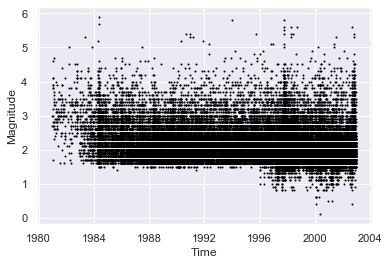

In [4]:
time_plot=[ datetime.datetime.strptime(z, '%y-%m-%d-%H:%M') for z in a['Time']]
plot=plt.scatter(time_plot, magnitude, color='black',s=1)# palette= sets the colour of hue
#plt.set(yscale="log")
#plt.xlim([np.min(time_plot), np.max(time_plot)])  
#plt.xticks(np.arange(1,10000, 5000)) #authomatically it considers dates
plt.xlabel('Time')
plt.ylabel('Magnitude') 


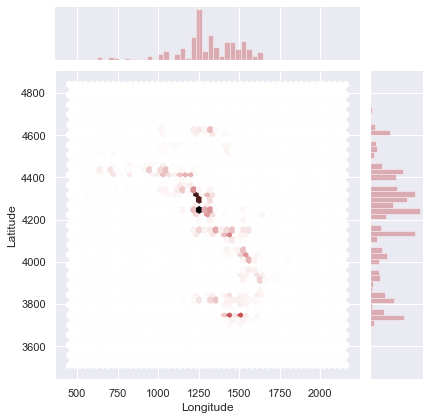

In [26]:
a['Magnitude']=magnitude
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
bin_magnitude=np.add(bin_magnitude,0.1)
number_of_earthquakes
sns.jointplot(x="Longitude", y="Latitude", data=a, kind='hex', color='r') #number of events are represented by shades of red

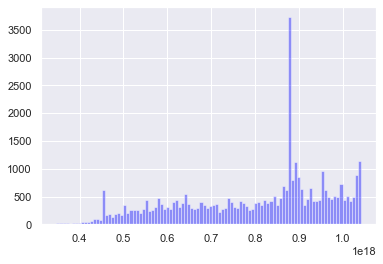

In [27]:
a['Time']=time_plot
#a_dropped['Time']
  #plot=plt.scatter(time_plot,, color='black',s=1)# palette= sets the colour of hue
b=a.sort_values(by='Time')
count=pd.Series([1 for i in range(len(a))])
count.name='Count'
b=pd.concat([b,count],axis=1)
b=b['Count'].groupby(b['Time'])
b_sum=pd.Series(b.sum())
#sns.distplot(b_sum,kde=False) # frequency of earthquakes per count
#b_sum.index().tolist(b_sum)
b_sum_index=b_sum.index.values
#IMPORTANT !!!!
#for a small area in which many earthquakes occured
#plt.bar(b_sum_index,b_sum,edgecolor='navy') #edgecolor: bar color
#plt.xlabel('Time')
#plt.ylabel('N. of erathquakes')
sns.distplot(b_sum_index,bins=100,color='blue',kde=False)
#.set_edgecolor(graph, 'blue')

In [115]:
a.to_csv('dataframe_fromCTI11.csv',index=False)

In [28]:
a_centern_italy=a[(a['Latitude']<4350) & (a['Latitude']>4050) & (a['Longitude']<1600)& (a['Longitude']>1050)] #REMEMBER PARENTHESES
a_centern_italy

,OriginTime,Time,Latitude,Longitude,Depth/Km,Magnitude,MagnitudeType,RMS,AzimutalGap,ERH,ERZ,DistSeismometer,NPH,Column14
1,23.85,1981-01-01 09:29:00,4247.96,1247.90,8.90,3,MCSTI,0.0917,123,0.6,2.8,47,16,81EV00002
46,21.13,1981-01-09 03:19:00,4214.50,1258.22,0.45,2.7,MCSTI,0.0861,134,0.3,1.4,29,8,81EV00048
59,45.66,1981-01-15 11:12:00,4051.65,1538.31,17.50,4.1,MCSTI,0.5263,130,0.3,1.3,66,90,81EV00061
61,47.10,1981-01-16 00:37:00,4050.27,1526.44,10.47,4.6,MCSTI,0.5365,88,0.2,0.5,33,100,81EV00063
68,25.99,1981-01-16 06:31:00,4050.09,1530.04,12.85,3.8,MCSTI,0.2786,204,6.7,99.0,35,44,81EV00070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91784,14.90,2002-12-29 22:09:00,4309.11,1252.69,13.98,2,MlREG,0.0208,167,1.2,1.0,13,10,02EV11390
91787,8.85,2002-12-30 05:55:00,4141.42,1500.32,29.65,2.1,MlREG,0.2452,136,0.4,1.7,19,16,02EV11398
91789,45.48,2002-12-30 06:52:00,4237.15,1312.55,6.03,1.9,MlREG,0.1434,194,0.5,16.7,33,12,02EV11400
91792,11.79,2002-12-30 14:58:00,4139.00,1449.35,4.81,1.9,MlREG,0.3843,145,0.8,9.0,34,8,02EV11404


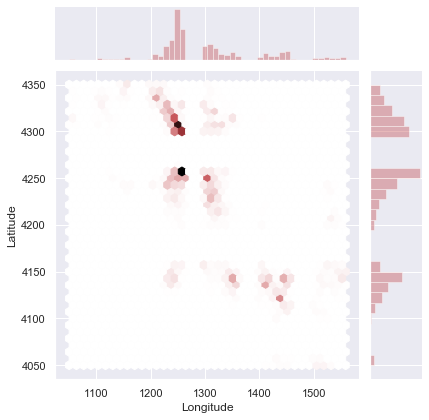

In [29]:
sns.jointplot(x="Longitude", y="Latitude", data=a_centern_italy, kind='hex', color='r')

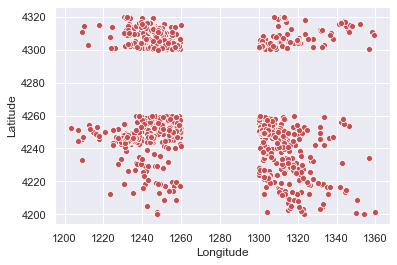

In [23]:
#Colfiorito
from datetime import datetime
lat=(a['Latitude']<4320) & (a['Latitude']>4200)
long=(a['Longitude']<1400)& (a['Longitude']>1200)
#a['Time'].astype(int)
#a['Time'].astype(datetime)
a['Time'].astype('datetime64[ns]').tolist()
#convert datetime 64 to datetime
dt = datetime.utcnow() 
dt64 = np.datetime64(dt)
time_new=[]
for i in a['Time']:
    ts = (dt64 - np.datetime64(i)) / np.timedelta64(1, 's')
    times=datetime.utcfromtimestamp(ts)
    time_new.append(times)
#a['Time']=time_new
tm=(a['Time']< datetime(1998,10,1,0,0,0))& (a['Time']>=datetime(1996,12,1,0,0,0) )


a_colfiorito= a[(lat) & (long) & (tm)]
sns.scatterplot(x="Longitude", y="Latitude", data=a_colfiorito, color='r' )

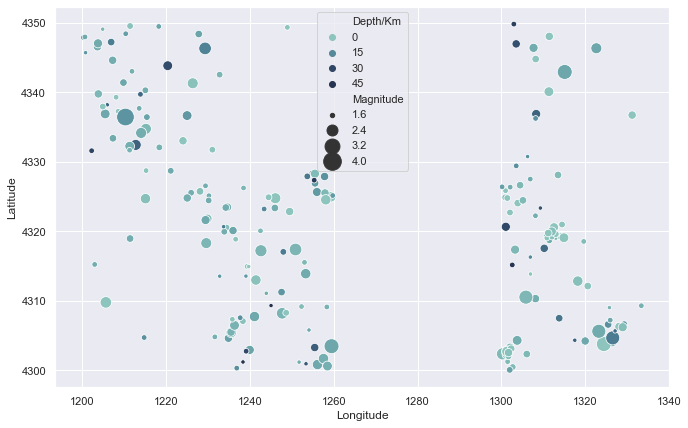

In [282]:
from matplotlib.pyplot import figure
fig=plt.figure(figsize=(11,7))
ax=fig.add_subplot(1,1,1)
cmap = sns.cubehelix_palette(dark=.2, light=.7, as_cmap=True,rot=-.3)
ax1=sns.scatterplot(x='Longitude', y="Latitude" , data=a_colfiorito, size='Magnitude', hue='Depth/Km',sizes=(19, 310),palette=cmap) #changes the maximum
#and the minimum point size

#plt.grid(color='b', linestyle='-', linewidth=0.2)
ax1


In [287]:
a_colfiorito

,OriginTime,Time,Latitude,Longitude,Depth/Km,Magnitude,MagnitudeType,RMS,AzimutalGap,ERH,ERZ,DistSeismometer,NPH,Column14
26841,0.53,1998-09-28 01:42:46.634523,4324.94,1259.28,0.02,2.3,MlREG,0.1525,121,0.7,1.5,9,16,91EV01920
26844,40.15,1998-09-27 06:20:46.634523,4323.19,1243.40,14.89,1.7,MlREG,0.0372,227,0.7,2.8,21,7,91EV01923
26853,38.07,1998-09-26 12:57:46.634523,4320.52,1234.43,1.95,1.8,MlREG,0.2781,133,2.3,4.0,32,13,91EV01932
26888,5.79,1998-09-24 06:55:46.634523,4319.24,1310.80,6.04,1.8,MlREG,0.2719,99,0.4,99.0,14,12,91EV01967
26889,3.65,1998-09-24 05:23:46.634523,4304.15,1326.29,10.30,2.4,MlREG,0.3836,155,1.0,2.6,23,18,91EV01968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32734,38.91,1996-12-21 06:48:46.634523,4302.52,1301.68,1.08,2,MlREG,0.2571,166,0.9,2.8,31,10,93EV01221
32791,6.95,1996-12-17 20:42:46.634523,4304.69,1214.78,13.24,1.7,MlREG,0.2025,179,0.6,7.7,33,10,93EV01278
32806,29.79,1996-12-17 00:45:46.634523,4313.83,1306.92,0.05,1.6,MlREG,0.1556,169,0.4,1.5,32,7,93EV01293
32817,3.53,1996-12-16 01:50:46.634523,4324.44,1305.12,3.05,1.9,MlREG,0.2227,274,5.9,7.0,15,7,93EV01304


Text(0.5, 0.92, 'Eartquakes in 3D')

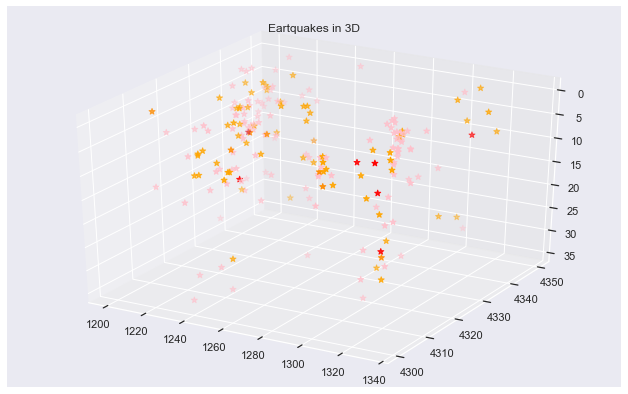

In [303]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111, projection='3d')
#colour=excel_data[1]
colors = []
for wt in a_colfiorito['Magnitude']:
    if wt < 2.0:
        colors.append('pink')
    elif wt<2.5:
        colors.append('orange')
    elif wt <3.0:
        colors.append('darkorange')
    elif wt <3.5:
        colors.append('red')
    elif wt <4.0:
        colors.append('crimson')
    elif wt <4.5:   
        colors.append('darkred')
    else:
        colors.append('indigo')
markers=['*' if m >= 3.0 else 'o' for m in a_colfiorito['Magnitude']]

ax.scatter(a_colfiorito['Longitude'], a_colfiorito['Latitude'], a_colfiorito['Depth/Km'], 
        s=40, marker='*',c=colors )
plt.gca().invert_zaxis() #it inverts z axis
plt.rcParams['xtick.labeltop']
ax.set_title('Eartquakes in 3D')


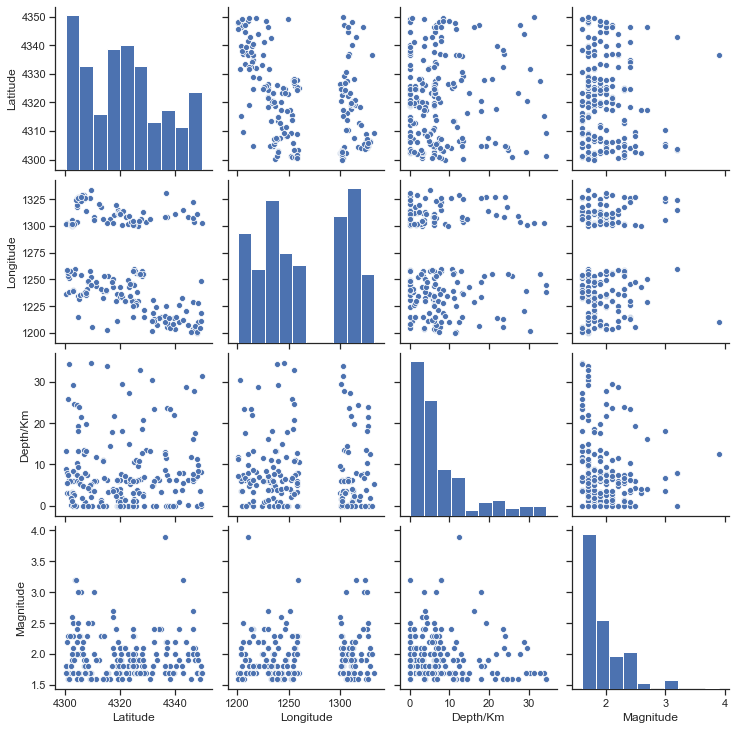

In [306]:
new_a_colfiorito=a_colfiorito.iloc[:,1:6]
sns.set(style="ticks")
sns.pairplot(data=new_a_colfiorito)